In [1]:
import pandas as pd
import numpy as np

In [101]:
mri_csv = pd.read_csv('archive/oasis_longitudinal.csv')
mri_csv['Group'].replace('Converted', 'Demented', inplace=True)

In [102]:
mri_csv.describe()

,Visit,MR Delay,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
count,373.000000,373.000000,373.000000,373.000000,354.000000,371.000000,373.000000,373.000000,373.000000,373.000000
mean,1.882038,595.104558,77.013405,14.597855,2.460452,27.342318,0.290885,1488.128686,0.729568,1.195461
std,0.922843,635.485118,7.640957,2.876339,1.134005,3.683244,0.374557,176.139286,0.037135,0.138092
min,1.000000,0.000000,60.000000,6.000000,1.000000,4.000000,0.000000,1106.000000,0.644000,0.876000
25%,1.000000,0.000000,71.000000,12.000000,2.000000,27.000000,0.000000,1357.000000,0.700000,1.099000
50%,2.000000,552.000000,77.000000,15.000000,2.000000,29.000000,0.000000,1470.000000,0.729000,1.194000
75%,2.000000,873.000000,82.000000,16.000000,3.000000,30.000000,0.500000,1597.000000,0.756000,1.293000
max,5.000000,2639.000000,98.000000,23.000000,5.000000,30.000000,2.000000,2004.000000,0.837000,1.587000


In [103]:
mri_csv = mri_csv.fillna(mri_csv.mean())
mri_csv

/var/folders/25/hkg7hrfn7130z9vkbc1z1h580000gn/T/ipykernel_17328/2516103592.py:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  mri_csv = mri_csv.fillna(mri_csv.mean())


,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0001,OAS2_0001_MR1,Nondemented,1,0,M,R,87,14,2.000000,27.0,0.0,1987,0.696,0.883
1,OAS2_0001,OAS2_0001_MR2,Nondemented,2,457,M,R,88,14,2.000000,30.0,0.0,2004,0.681,0.876
2,OAS2_0002,OAS2_0002_MR1,Demented,1,0,M,R,75,12,2.460452,23.0,0.5,1678,0.736,1.046
3,OAS2_0002,OAS2_0002_MR2,Demented,2,560,M,R,76,12,2.460452,28.0,0.5,1738,0.713,1.010
4,OAS2_0002,OAS2_0002_MR3,Demented,3,1895,M,R,80,12,2.460452,22.0,0.5,1698,0.701,1.034
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
368,OAS2_0185,OAS2_0185_MR2,Demented,2,842,M,R,82,16,1.000000,28.0,0.5,1693,0.694,1.037
369,OAS2_0185,OAS2_0185_MR3,Demented,3,2297,M,R,86,16,1.000000,26.0,0.5,1688,0.675,1.040
370,OAS2_0186,OAS2_0186_MR1,Nondemented,1,0,F,R,61,13,2.000000,30.0,0.0,1319,0.801,1.331
371,OAS2_0186,OAS2_0186_MR2,Nondemented,2,763,F,R,63,13,2.000000,30.0,0.0,1327,0.796,1.323


In [104]:
from sklearn import preprocessing

In [105]:
X = mri_csv.iloc[:, 5:]
le_X = preprocessing.LabelEncoder()
le_X.fit(X['M/F'])
X['M/F'] = le_X.transform(X['M/F'])
X = X.drop('Hand', axis=1)
X.head()

,M/F,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,1,87,14,2.000000,27.0,0.0,1987,0.696,0.883
1,1,88,14,2.000000,30.0,0.0,2004,0.681,0.876
2,1,75,12,2.460452,23.0,0.5,1678,0.736,1.046
3,1,76,12,2.460452,28.0,0.5,1738,0.713,1.010
4,1,80,12,2.460452,22.0,0.5,1698,0.701,1.034


In [106]:
scaler = preprocessing.StandardScaler()
scaler.fit(X)

X = scaler.transform(X)
X

array([[ 1.15379808,  1.30873772, -0.20813199, ...,  2.83605891,
        -0.90516867, -2.2657425 ],
       [ 1.15379808,  1.43978716, -0.20813199, ...,  2.93270307,
        -1.30964265, -2.31650145],
       [ 1.15379808, -0.26385558, -0.90439416, ...,  1.07940909,
         0.17342861, -1.08378418],
       ...,
       [-0.86670278, -2.09854775, -0.55626308, ..., -0.96148827,
         1.92614919,  0.98283006],
       [-0.86670278, -1.83644887, -0.55626308, ..., -0.91600866,
         1.79132453,  0.92481984],
       [-0.86670278, -1.57434999, -0.55626308, ..., -0.88189896,
         1.92614919,  0.88131217]])

In [29]:
from sklearn.decomposition import PCA
X_projected = {}

In [30]:
for i in range(2, 9, 2):
    pca = PCA(i)
    pca.fit(X)

    X_projected[i] = pca.transform(X)
X_projected

{2: array([[-3.57522476e+00, -2.02598715e-01],
        [-3.68938632e+00, -5.04467189e-01],
        [-1.54521796e+00,  1.19954374e+00],
        [-1.90547480e+00,  6.43801239e-01],
        [-1.99685553e+00,  1.71653270e+00],
        [ 1.84365579e+00, -3.53008956e-01],
        [ 1.96581688e+00, -2.36721226e-01],
        [-1.16625251e+00,  5.38506005e-01],
        [-1.40661434e+00,  1.12823386e+00],
        [-1.27293797e+00,  3.67836671e-01],
        [ 3.33203467e-01, -1.79148779e-03],
        [-8.65484999e-02,  1.05165922e+00],
        [-2.83023613e-01,  1.22627691e+00],
        [ 1.44376482e+00, -2.83453281e-01],
        [ 1.53625267e+00, -1.40914929e-01],
        [ 3.54451972e-01, -9.14753798e-02],
        [ 1.63932119e-03,  4.79537005e-01],
        [ 1.34384415e+00, -1.48033979e-01],
        [ 9.46410874e-01,  1.50637253e-01],
        [ 1.34284034e+00, -1.13050513e+00],
        [ 1.31607628e+00, -1.00377597e+00],
        [ 1.13866370e+00, -7.81615599e-01],
        [ 2.67688256e+00,  3.

In [133]:
y = mri_csv['Group']
le_y = preprocessing.LabelEncoder()
le_y.fit(y)
y = le_y.transform(y)
y[0:10]

array([1, 1, 0, 0, 0, 1, 1, 1, 1, 1])

In [134]:
algorithms = {}

In [148]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, roc_auc_score, precision_score, f1_score

def algorithms_by_pca(alg, X, y, k):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, shuffle=True, random_state=k)
    y_pred = alg.fit(X_train, y_train).predict(X_test)

    df = pd.DataFrame(data=[accuracy_score(y_test, y_pred), recall_score(y_test, y_pred),
                    precision_score(y_test, y_pred), roc_auc_score(y_test, y_pred), f1_score(y_test, y_pred)],
                index=["accuracy", "recall", "precision", "roc_auc_score", "f1"])
    return df

NAIVE BAYES

In [150]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
df_nb = pd.DataFrame()
for i in X_projected:
    df_nb[i] = sum([algorithms_by_pca(gnb, X_projected[i], y, _) for _ in range(200)]) / 200
algorithms['Naive Bayes'] = df_nb
df_nb

,2,4,6,8
accuracy,0.790882,0.842059,0.872086,0.897888
recall,0.871446,0.932889,0.936823,0.944592
precision,0.757655,0.795509,0.834909,0.868816
roc_auc_score,0.789681,0.840823,0.871304,0.897506
f1,0.809505,0.857650,0.881988,0.904331


DECISION TREE

In [139]:
from sklearn import tree

clf = tree.DecisionTreeClassifier()
df_dt = pd.DataFrame()
for i in X_projected:
    df_dt[i] = sum([algorithms_by_pca(clf, X_projected[i], y, _) for _ in range(100)])/100
algorithms['Decision Tree'] = df_dt
df_dt

,2,4,6,8
accuracy,0.745561,0.848128,0.845455,0.849679
recall,0.744803,0.852960,0.847350,0.855435
precision,0.757935,0.852819,0.852798,0.853947
roc_auc_score,0.746796,0.848909,0.846495,0.850601
f1,0.748878,0.851110,0.848086,0.853026


Random Forest

In [140]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(max_depth=2, random_state=0)

df_rf = pd.DataFrame()
for i in X_projected:
    df_rf[i] = sum([algorithms_by_pca(clf, X_projected[i], y, _) for _ in range(100)])/100
algorithms['Random Forest'] = df_rf
df_rf

,2,4,6,8
accuracy,0.791176,0.855080,0.860267,0.877112
recall,0.834995,0.920647,0.907101,0.929115
precision,0.777985,0.820690,0.836268,0.849185
roc_auc_score,0.791505,0.854791,0.860526,0.878026
f1,0.803220,0.866279,0.868735,0.885168


SVM

In [141]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

clf = make_pipeline(StandardScaler(), SVC(gamma='auto'))
df_svm = pd.DataFrame()
for i in X_projected:
    df_svm[i] = sum([algorithms_by_pca(clf, X_projected[i], y, _) for _ in range(100)])/100
algorithms['SVM'] = df_svm
df_svm

,2,4,6,8
accuracy,0.812406,0.940000,0.946150,0.946631
recall,0.846210,0.980518,0.986769,0.986773
precision,0.800200,0.909507,0.914657,0.915363
roc_auc_score,0.812397,0.939324,0.945375,0.945847
f1,0.821485,0.943391,0.949158,0.949577


AdaBoost

In [142]:
from sklearn.ensemble import AdaBoostClassifier

clf = AdaBoostClassifier(n_estimators=100, random_state=0)

df_ada = pd.DataFrame()
for i in X_projected:
    df_ada[i] = sum([algorithms_by_pca(clf, X_projected[i], y, _) for _ in range(100)])/100
algorithms['AdaBoost'] = df_ada
df_ada

,2,4,6,8
accuracy,0.755615,0.879144,0.901444,0.922888
recall,0.771063,0.879191,0.903327,0.929141
precision,0.758050,0.885264,0.905280,0.921927
roc_auc_score,0.755981,0.879769,0.902173,0.923464
f1,0.762755,0.881113,0.903373,0.924795


Logistic Regression

In [143]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(random_state=1, max_iter=100000)
df_lr = pd.DataFrame()
for i in X_projected:
    df_lr[i] = sum([algorithms_by_pca(clf, X_projected[i], y, _) for _ in range(100)])/100
algorithms['Logistic Regression'] = df_lr
print(df_lr)

                      2         4         6         8
accuracy       0.810642  0.940963  0.946791  0.946898
recall         0.838440  0.970240  0.984863  0.987253
precision      0.802425  0.919082  0.917258  0.915421
roc_auc_score  0.810916  0.940542  0.946095  0.946058
f1             0.818777  0.943709  0.949676  0.949840


In [120]:
from scipy.interpolate import interp1d

In [151]:
def get_graph(i):
    algo_smooth = {}
    for alg in algorithms:
        df = algorithms[alg]
        f = interp1d(df.columns, df.iloc[i].values, kind = "cubic")

        x_dense = np.linspace(2, 8, 100)
        y_dense = f(x_dense)
        algo_smooth[alg] = (x_dense, y_dense)
    return algo_smooth

algo_accuracy = get_graph(0)

algo_accuracy

{'Decision Tree': (array([2.        , 2.06060606, 2.12121212, 2.18181818, 2.24242424,
         2.3030303 , 2.36363636, 2.42424242, 2.48484848, 2.54545455,
         2.60606061, 2.66666667, 2.72727273, 2.78787879, 2.84848485,
         2.90909091, 2.96969697, 3.03030303, 3.09090909, 3.15151515,
         3.21212121, 3.27272727, 3.33333333, 3.39393939, 3.45454545,
         3.51515152, 3.57575758, 3.63636364, 3.6969697 , 3.75757576,
         3.81818182, 3.87878788, 3.93939394, 4.        , 4.06060606,
         4.12121212, 4.18181818, 4.24242424, 4.3030303 , 4.36363636,
         4.42424242, 4.48484848, 4.54545455, 4.60606061, 4.66666667,
         4.72727273, 4.78787879, 4.84848485, 4.90909091, 4.96969697,
         5.03030303, 5.09090909, 5.15151515, 5.21212121, 5.27272727,
         5.33333333, 5.39393939, 5.45454545, 5.51515152, 5.57575758,
         5.63636364, 5.6969697 , 5.75757576, 5.81818182, 5.87878788,
         5.93939394, 6.        , 6.06060606, 6.12121212, 6.18181818,
         6.242424

In [152]:
from matplotlib.pyplot import plot, grid, legend, xlabel, ylabel, ylim, title, xticks, figure
import matplotlib.pyplot as plt
colors = plt.cm.get_cmap("Dark2")

def paint_graph(algo_values, col_name):
    plt.clf()


    figure(figsize=(12, 6))
    for i, alg in enumerate(algo_values):
        x_dense, y_dense = algo_values[alg]
        plot(x_dense, y_dense, color=colors(i), markerfacecolor='blue', label=alg, linewidth=3.0)

    grid() # сетка
    legend(loc='best', fontsize=16)

    #Подписи для осей:
    xlabel('Feature dimension generated by PCA', fontsize=14)
    # повернём подпись на 90 градусов
    ylabel(col_name, fontsize=14)
    ylim(0, 1.2)
    xticks(rotation=45, ha='right')

<Figure size 640x480 with 0 Axes>

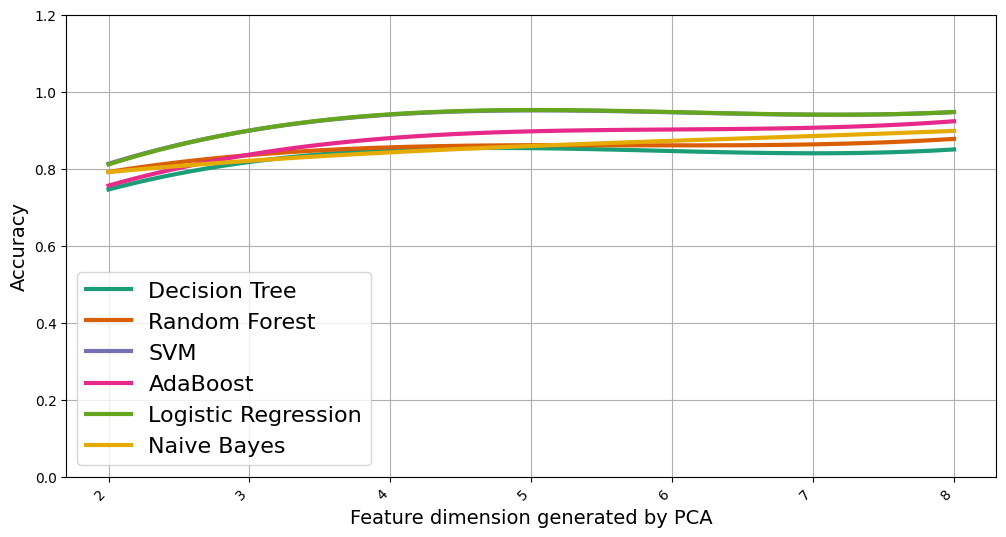

In [153]:
paint_graph(algo_accuracy, 'Accuracy')

<Figure size 640x480 with 0 Axes>

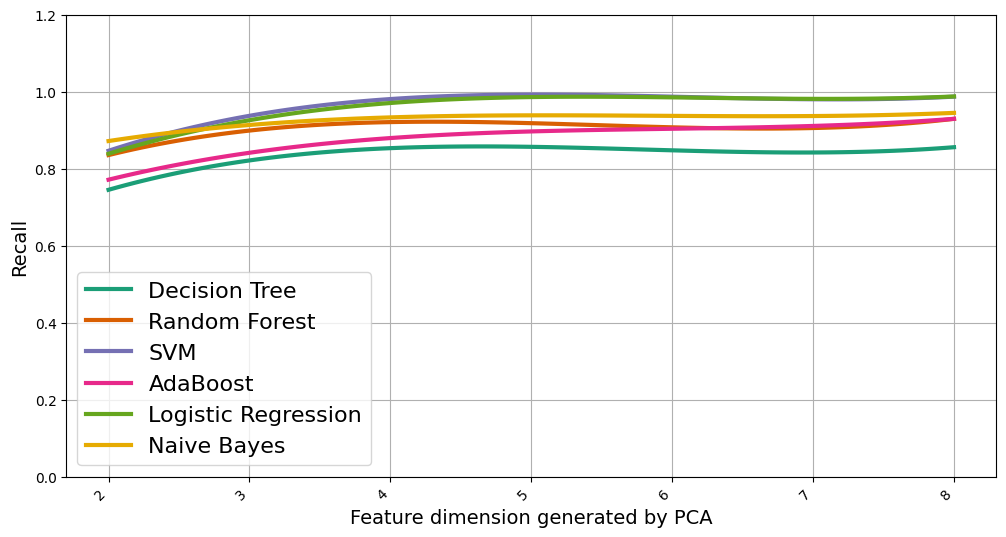

In [154]:
algo_recall = get_graph(1)
paint_graph(algo_recall, 'Recall')

<Figure size 640x480 with 0 Axes>

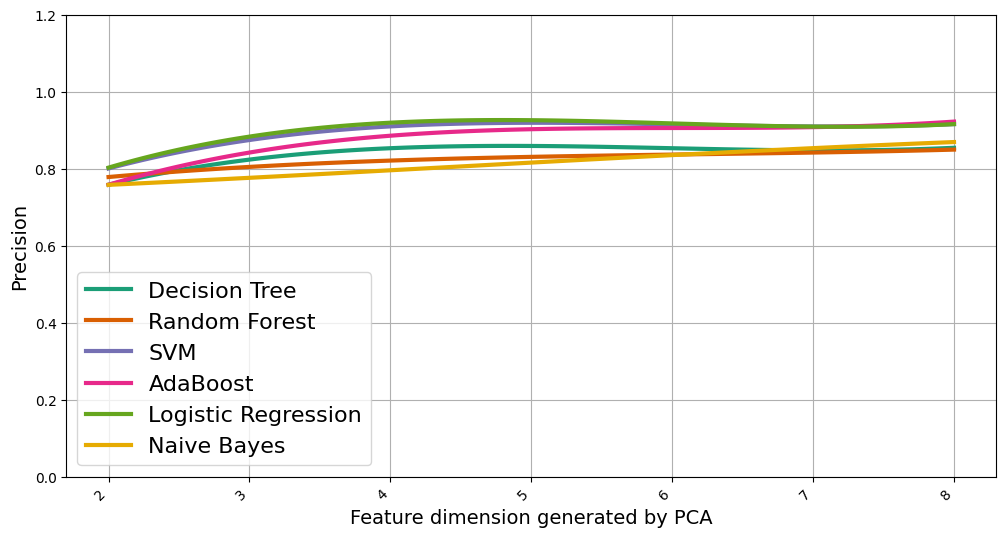

In [155]:
algo_precision = get_graph(2)
paint_graph(algo_precision, 'Precision')

<Figure size 640x480 with 0 Axes>

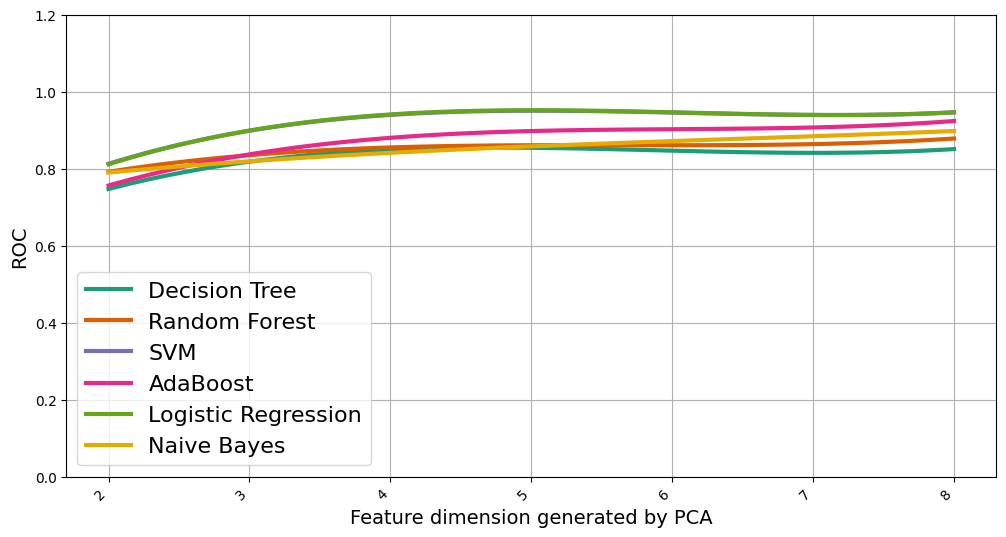

In [156]:
algo_roc = get_graph(3)
paint_graph(algo_roc, 'ROC')

<Figure size 640x480 with 0 Axes>

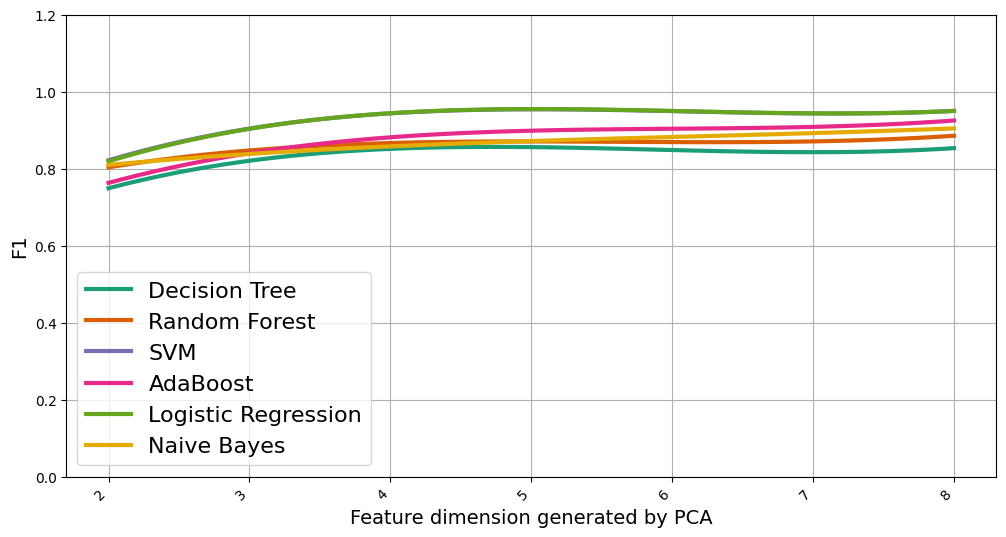

In [157]:
algo_f1 = get_graph(4)
paint_graph(algo_f1, 'F1')